# Hulu 百面机器学习(1.1)——特征归一化
## Q: 为什么要对数值类型的特征做归一化？(Lv1)

咱们准备工作先下好数据集和该引进的所有包

In [2]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

from memory_profiler import profile
import time

url = "http://archive.ics.uci.edu//ml//machine-learning-databases//wine//wine.data"
raw_data = urllib.request.urlopen(url)
data0 = np.loadtxt(raw_data, delimiter=",")

Hulu百面机器学习实战系列说到特征归一化，我们常用两种方法：

- 线性函数归一化(Min-Max Scaling)

原始数据映射到$[0,1]$的范围，实现对原始数据的等比缩放。归一化公式如下:

## $ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $

其中：$X_{norm}$, $X$, $X_{min}$, $X_{max}$ 分别为转换后的值，转换前的值，X的最小值和最大值

- 零均值归一化(z-score Normalization)

去掉平均值以后除以数组的标准差，公式如下：

## $ z = \frac{X - \mu}{\sigma} $

其中：$z$, $X$, $\mu$, $\sigma$ 分别为转换后的值，转换前的值，数组平均值和标准差

接下来咱们进入实战吧！

在正式实战之前，我们准备urllib.request去下载晚上uci机器学习数据库内的数据，这次我们用的是葡萄酒数据：

In [3]:
def minmax(arr):
    return (arr - np.min(arr, axis=0)) / (np.max(arr, axis=0) - np.min(arr, axis=0))

def zssd(arr, epsilon = 1e-12):
    return (arr - np.mean(arr, axis=0)) / (np.std(arr, axis=0) + epsilon)

@profile
def normalization(arr,norm_type):
    return scalers_func[norm_type](arr)

scalers_func = {'minmax': minmax, 'zssd':zssd}
@profile
def repeats(n):
    t0 = time.time()
    for _ in range(n):
        data1 = normalization(data0, 'minmax')
        data2 = normalization(data0, 'zssd')
    t1 = time.time()
    print(t1-t0)

用numpy硬干模式：(以下代码的好处便是直接运算返回结果)

时间耗费0.13~0.18s；时间复杂度$O(n)$

内存占用143.4MiB；空间复杂度$O(n)$

n为一个数组的数据点总数

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

n = 1000
t0 = time.time()
for _ in range(n):
    data1 = min_max_scaler.fit_transform(data0)
    data2 = standard_scaler.fit_transform(data0)
t1 = time.time()
print(t1-t0)

0.7051122188568115


sklearn经典模式：

时间耗费0.68~0.85s；时间复杂度$O(n)$

内存占用143.4MiB；空间复杂度$O(n)$

n为一个数组的数据点总数

现在的问题是：为什么广为流传的sklearn包归一化数据的时间远多于粗暴的numpy代码呢？

如果你看sklearn的源码或者documentation的话，就会发现它的kwarg相当之多，代码就比我的numpy粗暴算法复杂得多。

因此，如果仅仅按本文的常见公式去做简单的归一化处理，直接用numpy或者甚至不用numpy就可以搞定，成熟机器学习包里面诸如取最大最小值、归一化等简单操作不值得用。

接下来是画图啦！

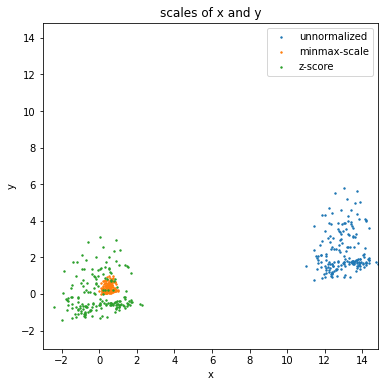

In [10]:
fig = plt.figure(figsize = (6,6))
plt.title('scales of x and y')
plt.xlabel('x')
plt.ylabel('y')
mins = np.min(data0,axis=0)
maxs = np.max(data0,axis=0)
plt.xlim([-3,max(maxs[1:3])])
plt.ylim([-3,max(maxs[1:3])])
plt.scatter(data0[:,1],data0[:,2],s=2)
plt.scatter(data1[:,1],data1[:,2],s=2)
plt.scatter(data2[:,1],data2[:,2],s=2)
plt.legend(['unnormalized','minmax-scale','z-score'])